# Importing Basic Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
# removing the unnamed: 0 col
df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
# checking null values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
# checking for duplicated rows

df.duplicated().sum()

29

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
# checking total number of rows and columns
df.shape

(1303, 11)

In [9]:
# seperating categorical and numerical columns
catvars=df.select_dtypes(include=['object']).columns
numvars=df.select_dtypes(include=['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [10]:
# function for unique values of each columns
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
# function for valuecounts of each columns

def valuecounts(col):
    print(f'Valuecounts of particular col {col} is : {df[col].value_counts()}')

for col in df.columns:
    uniquevals(col)
    print("_"*75)
    valuecounts(col)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
___________________________________________________________________________
Valuecounts of particular col Company is : Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
___________________________________________________________________________
Valuecounts of particular col TypeName is : TypeName
Notebook              727
Gaming                205
Ultrabook      

- so on observation we can see that if we remove "GB" from RAM, it can be converted as an integer value
- also for memory as well as weight i can classify it as floating variable
- using str.replace()

In [11]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

# converting from string -> integer for ram column
df['Ram']=df['Ram'].astype('int32')

# converting from string -> integer for weight column
df['Weight']=df['Weight'].astype('float32')

df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Analysis

C:\Users\Neelesha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


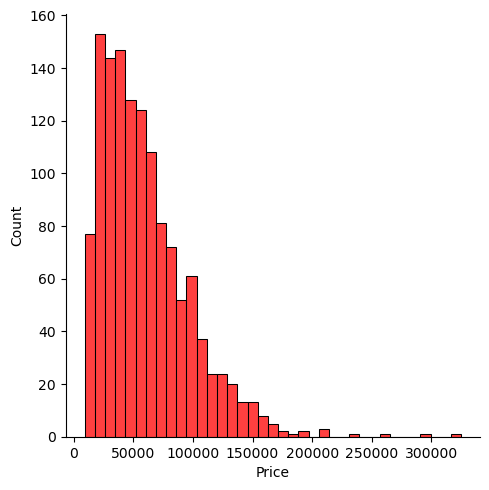

In [13]:
# viewing the distribution of the price column

sns.displot(df['Price'],color='red')

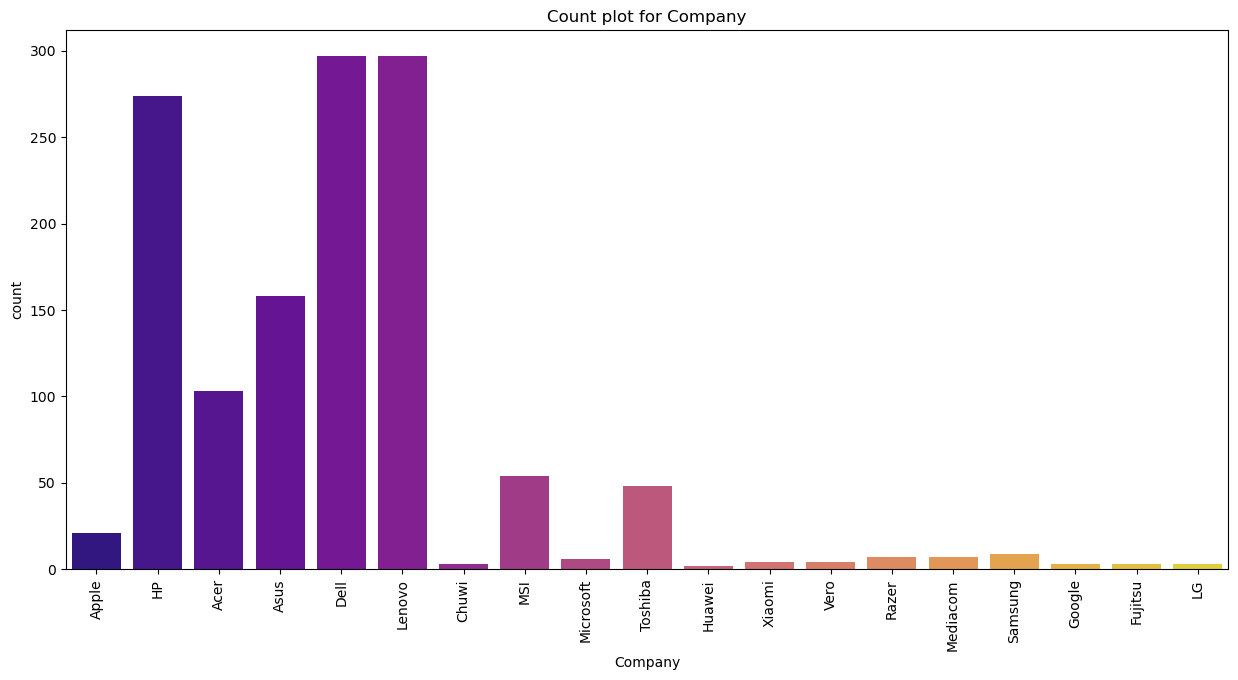

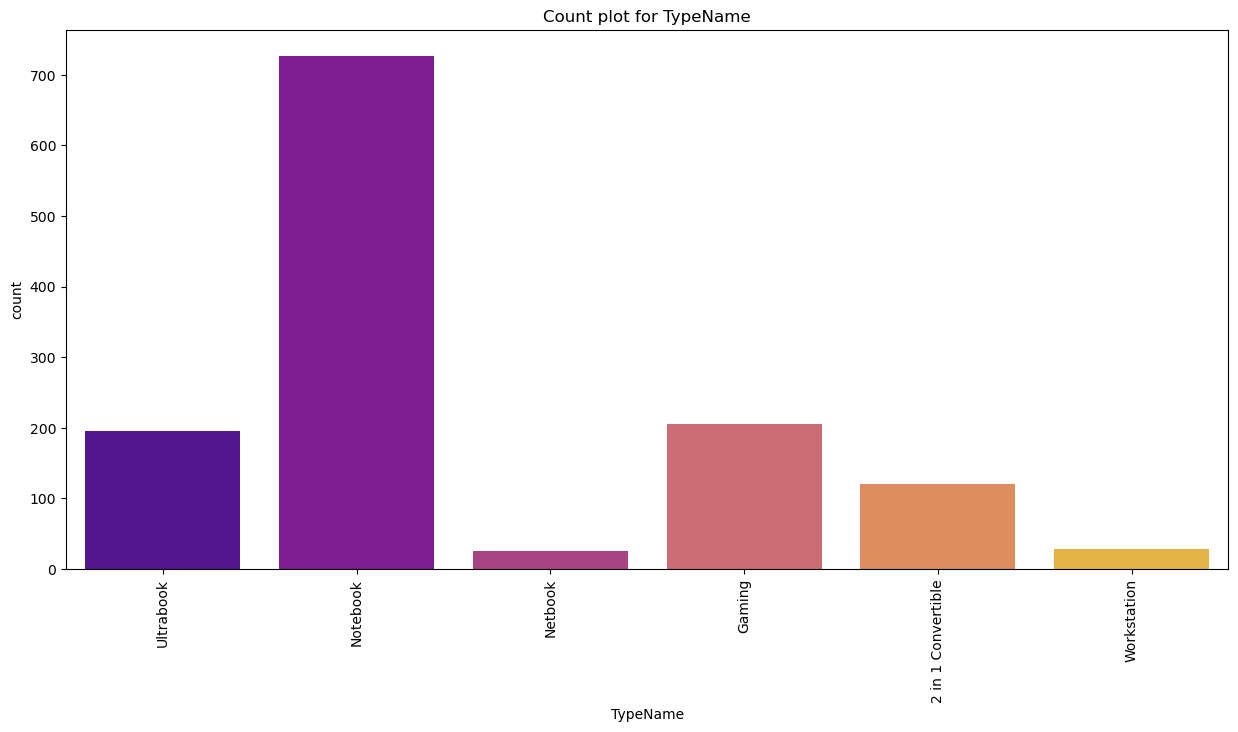

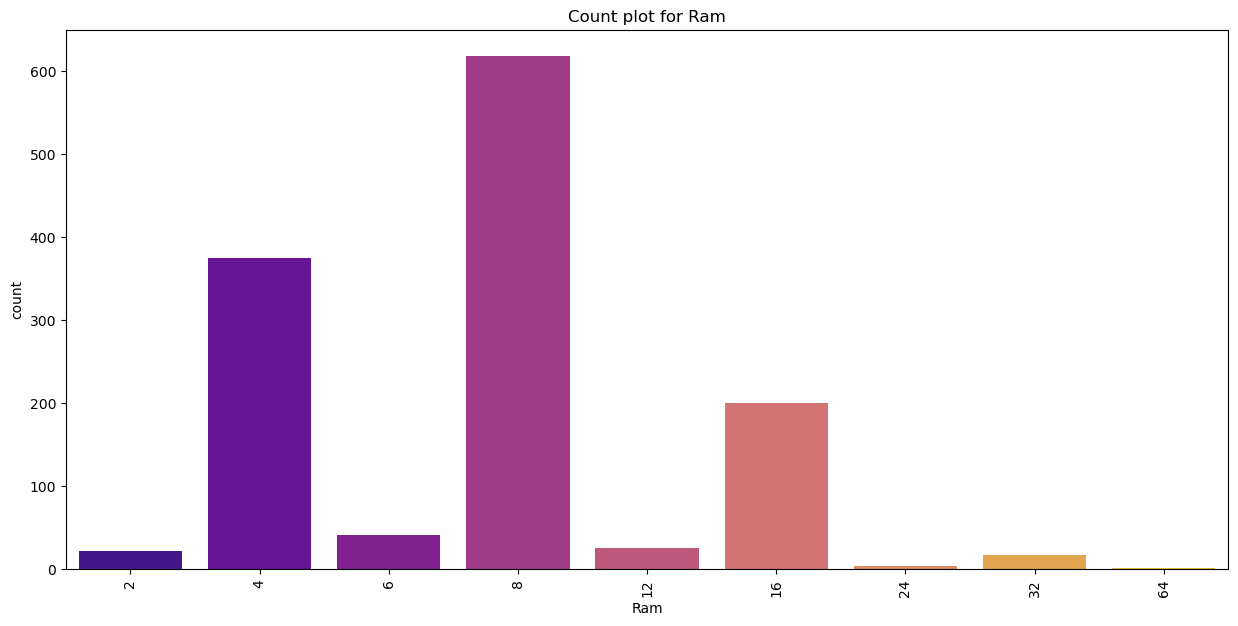

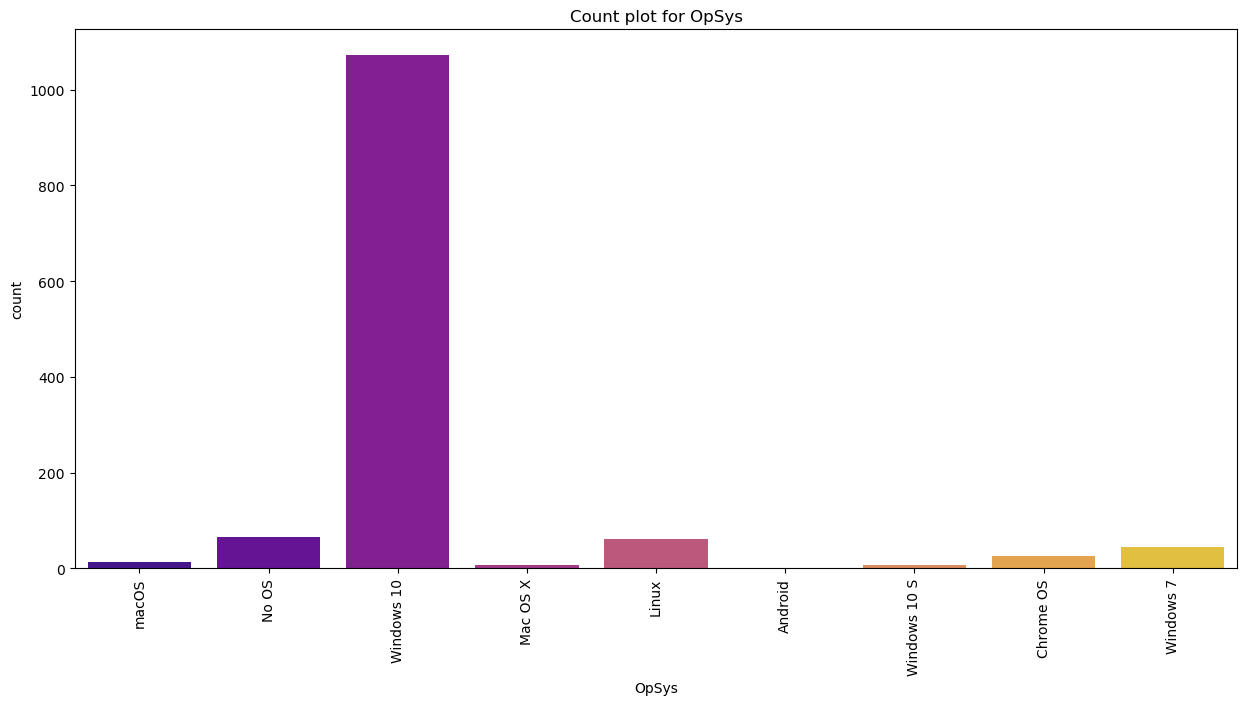

In [14]:
## ploting count plots and for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15, 7))
    sns.countplot(data=df, x=col, palette='plasma')
    plt.xticks(rotation='vertical')
    plt.title(f'Count plot for {col}')
    plt.show()

# List of columns to view
toview = ['Company', 'TypeName', 'Ram', 'OpSys']

for col in toview:
    drawplot(col)

### conclusions
- out of 1303 laptops, dell and lenovo laptops have higher count than other laptops
- we can see in TypeName countplot Notebook models are mostly sold than other model laptops
- laptops having 8GB Ram is sold more than other laptops
- windows 10 is widely used OS 

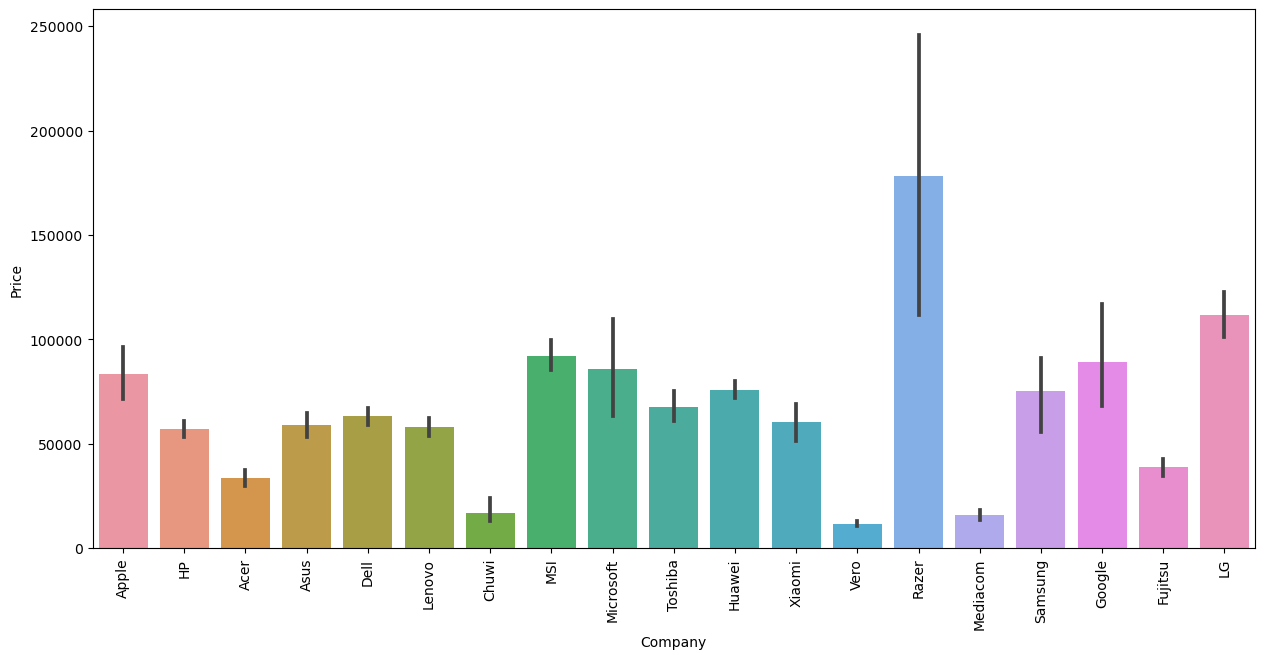

In [15]:
# average price for each of the laptop brands 
# this will say is the insight that as per company the price of the laptop vary

plt.figure(figsize=(15,7))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

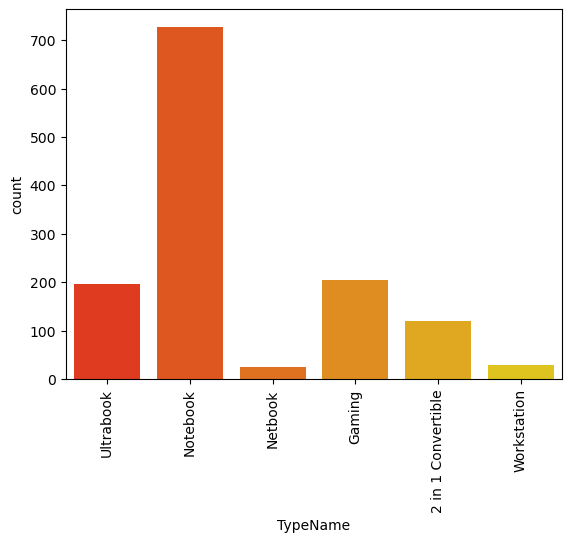

In [16]:
# various types of laptops

sns.countplot(data=df,x=df['TypeName'],palette='autumn')
plt.xticks(rotation='vertical')

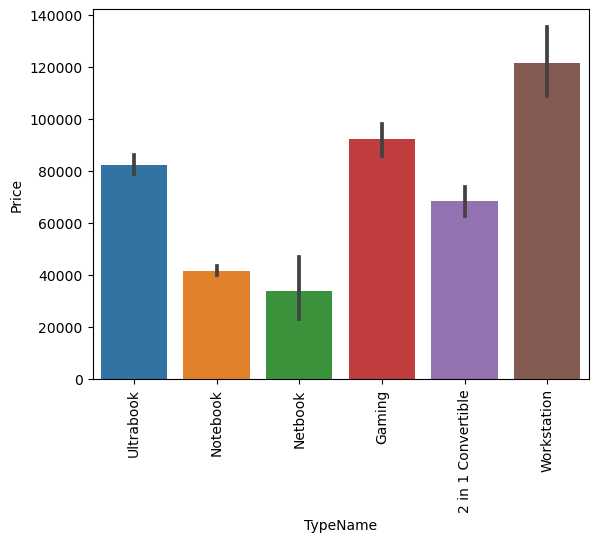

In [17]:
# Laptop type and variation about the price

sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# conclusion: price variation of notebook is small than other models because it is widely purchased as seen in above countplot

<Axes: xlabel='Inches', ylabel='Price'>

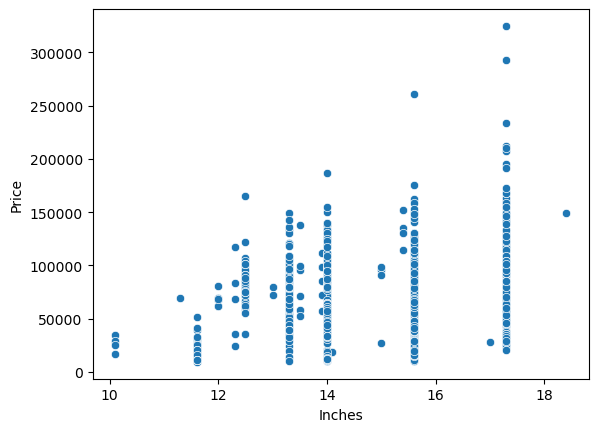

In [18]:
# variation of inche towards the price

sns.scatterplot(x=df['Inches'],y=df['Price'])

### Conclusion: 
- most of the people buy laptops around 13-14 inches because crowd there is higher
- around 17 inches laptops price can be higher than 3lakhs

#### For the Screen Resolution column we have many types of Screen Resolutions out there as shown Touch Screen and Normal and IPS Panel are the 3 parts on basis of wich we can segregate the things

In [19]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [20]:
# Creating a new col, touchscreen if the value is 1 that laptop is touchscreen

df['TouchScreen']=df['ScreenResolution'].apply(lambda element:1
                                              if 'Touchscreen' in element else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [21]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
256,HP,Notebook,15.6,1366x768,AMD A6-Series A6-9220 2.5GHz,8,128GB SSD,AMD Radeon R4 Graphics,Windows 10,1.91,23757.5520,0
355,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,51729.5520,0
419,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,1.75,64755.4464,0
853,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96,101391.8400,0
803,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,93186.7200,1
262,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.10,38468.1600,0
1229,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,61218.7200,0
425,Dell,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,61751.5200,0
870,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.38,56210.4000,0
1161,MSI,Gaming,14.0,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,1.70,94252.3200,0


In [22]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


<Axes: xlabel='TouchScreen', ylabel='count'>

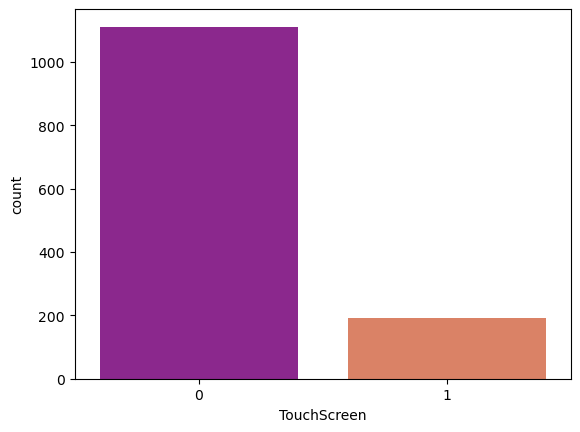

In [23]:
sns.countplot(data=df, x=df['TouchScreen'],palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

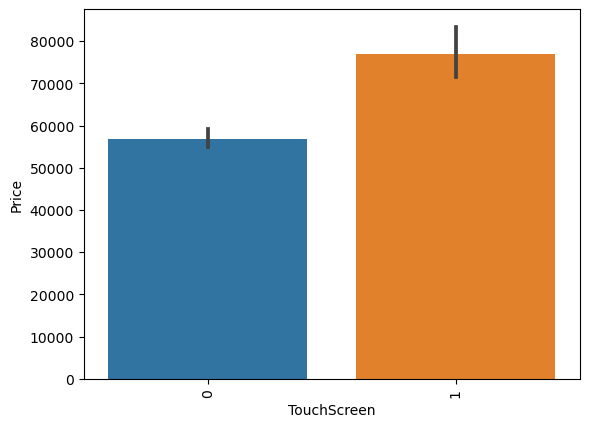

In [24]:
# TouchScreen on comparison with price of laptop 

sns.barplot(x=df['TouchScreen'], y=df['Price'])
plt.xticks(rotation='vertical')

### conclusion: 
- price of touch screen laptops are higher than non touchscreen laptops
- highest price of touchscreen laptop is 80k and minimum price is 70k

In [25]:
# Creating a new col na,ed IPS, does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(lambda element:1
                                        if 'IPS' in element else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1060,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,57009.60,0,0
798,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,71874.72,1,1
445,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,62817.12,0,0
1286,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0,0
1122,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,80612.64,0,0


<Axes: xlabel='IPS', ylabel='count'>

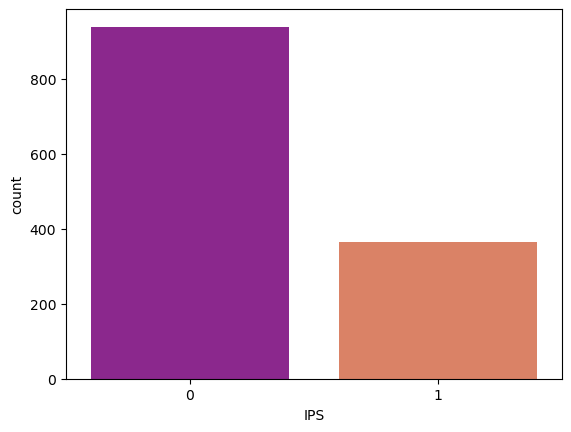

In [26]:
sns.countplot(data=df, x=df['IPS'],palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

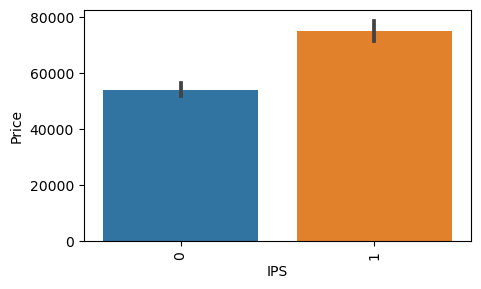

In [27]:
# price variation with respect to the IPS col

plt.figure(figsize=(5,3))
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation='vertical')

### Extracting the X Resolution and Y resolution

In [28]:
# we will split the text at the "x" letter and seperate the 2 parts 
# from this we can observe that one of the col is y res we need to do 
# some feature engineering on the x res col

splitdf = df['ScreenResolution'].str.split('x',n=1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [29]:
splitdf=df['ScreenResolution'].str.split('x',n=1,expand=True)

df['X_res']=splitdf[0]
df['Y_res']=splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


- so basically from that whole text of X_res col, we need to exteact the digits from it, but the problem is the numbers are scattered in some cases, that is the reason why i am using regex, if we use this we will exactly get the numbers which we are looking for.
- so firstly we will replace all the "," with "" and then find all numbers from that string as "\d+\.?\d+", \d means integer number and \.? all the numbers which comes after an number and \d+ the string must end with a number

In [30]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [31]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


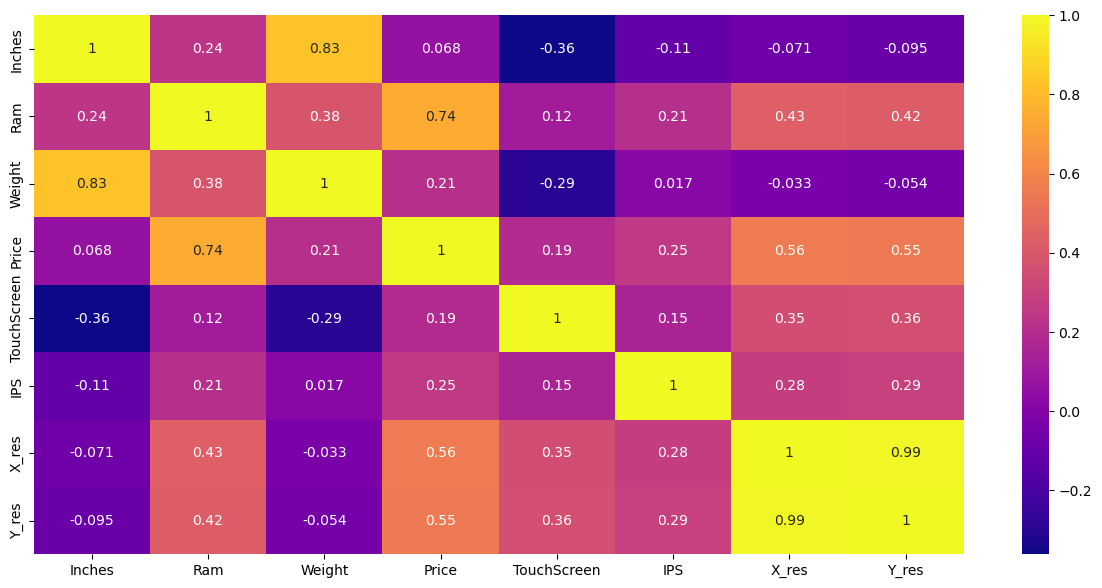

In [32]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

In [33]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

#### From correlation plot we observed that as the X_res and Y_res i increasing, the price of the laptop is also increasing, so x_res and y_res are positively correlated and they are giving much information, so that is the reason why i had splitted resolution column into x_res and y_res.

#### So to make things good, we can create a new column named PPI(pixels per Inch), now as we saw from the correlation plot that the  X_res and Y_res are having much collinearity, so why not combine with Inches which is having less collinearity, so we will combine them as follows.

In [34]:
df['PPI']=(((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [35]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

#### So as we observe from the correlation data that the PPI is having good correlation, so we will be using that as that is a combination of 3 features and that gives collective results of 3 columns, so we will drop Inches, x_res, Y_res as well

In [36]:

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


### Now we will work on CPU column, as that also has much text data and we need to process it efficiently as we may get good insights from them

In [37]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

#### Most common processors are made by intel right, so we will be clustering their processors into different categories like i5,i7, other, now other means the processors of intel which do not have i3,i5,i7 attached to it, they're completely different so that's the reason i will cluster them into other and other category is AMD which is different category in whole.

#### So if we observe we need to extract the 3 words of the CPU column as the 3 words of every row under the CPU col is the type of the CPU so we will be using them as shown:

In [38]:
df['CPU_name']=df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


#### As mentioned earlier, if we get any of the intel 'i3, i7, i5 ' versions we will return them a it is, but if we get any other processir we will first check whether is that a variant of intel? or not . If yes then we will tag it as "Other Intel Processor" else we will say it as 'AMD processor'

In [39]:
def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    elif text.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

df['CPU_name']=df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


In [40]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
420,Lenovo,2 in 1 Convertible,15.6,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,101178.7200,1,1,3840,2160,282.423996,Intel Core i7
667,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon 530,Windows 10,2.10,39693.6000,0,0,1920,1080,141.211998,Intel Core i7
555,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,500GB HDD,Intel HD Graphics 500,Linux,2.00,11934.7200,0,0,1366,768,100.454670,Other Intel Processor
913,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,54291.7872,0,0,1920,1080,141.211998,Intel Core i7
517,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,24,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24,158135.0400,0,0,1920,1080,141.211998,Intel Core i7


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

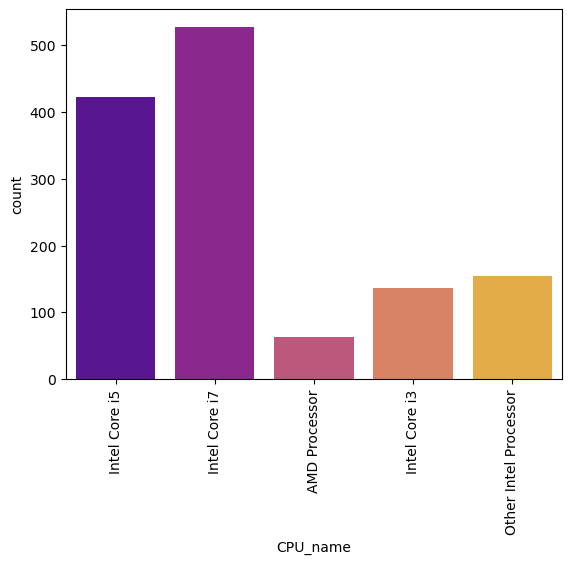

In [41]:
sns.countplot(data=df, x=df['CPU_name'],palette='plasma')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

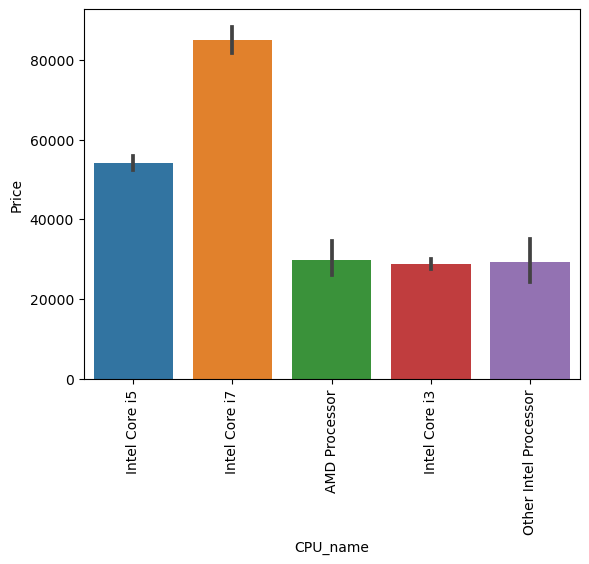

In [42]:
# price vs processor variation

sns.barplot(x=df['CPU_name'],y=df['Price'])
plt.xticks(rotation='vertical')

In [43]:
### dropping the cpu column

df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


In [44]:
df.drop(columns=['ScreenResolution'],inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


### Analysis on the RAM column

<Axes: xlabel='Ram', ylabel='count'>

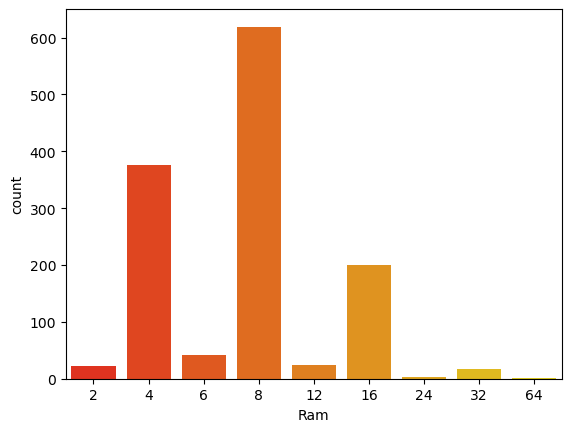

In [45]:
sns.countplot(data=df, x=df['Ram'],palette='autumn')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '6'),
  Text(3, 0, '8'),
  Text(4, 0, '12'),
  Text(5, 0, '16'),
  Text(6, 0, '24'),
  Text(7, 0, '32'),
  Text(8, 0, '64')])

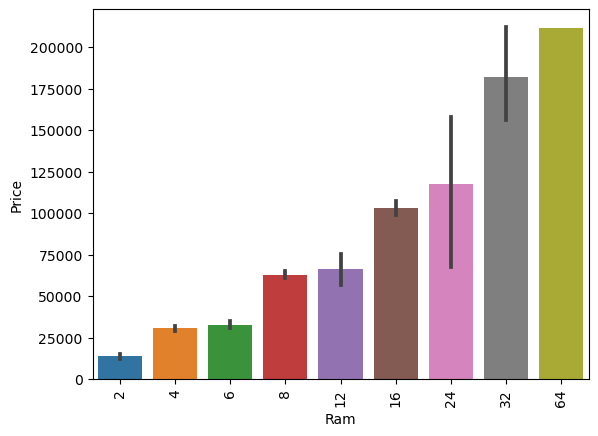

In [46]:
# ram is having good relation with price

sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')

#### About the memory column

#### we will seperate the Type of memory and the value  of it is just similar to the one which is done in the previous part

In [47]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [48]:
# we have different categories and also different kinds of variations

df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [49]:
# 4 most common variants observed: HDD, SSD,Flash and hybrid

df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)

# replace the GB word with ''
df['Memory']=df['Memory'].str.replace('GB','')

# replace TB word with '000'
df['Memory']=df['Memory'].str.replace('TB','')

# split the word across the "+" character
newdf= df['Memory'].str.split("+",n=1,expand=True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1 HDD,None


In [50]:
# we will strip up all the white spaces, basically eliminating white space

df['first']=newdf[0]
df['first']=df['first'].str.strip()
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,first
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,256 SSD


In [51]:
def applychanges(value):
    df['Layer1'+value]=df['first'].apply(lambda x:1 if value in x else 0)
    
listtoapply=['HDD','SSD','Hybrid','Flashstorage']
for value in listtoapply:
    applychanges(value)
    
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flashstorage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [52]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df['first'].value_counts()

first
256    508
1      250
128    177
512    140
500    132
32      45
64      17
2       16
16      10
180      5
240      1
8        1
508      1
Name: count, dtype: int64

In [53]:
df['Second']=newdf[1]
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,...,X_res,Y_res,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flashstorage,Second
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,2560,1600,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,1440,900,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,1920,1080,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,2880,1800,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,2560,1600,226.983005,Intel Core i5,256,0,1,0,0,None


In [54]:
def applychanges1(value):
    df['Layer2' + value] = df['Second'].apply(lambda x: 1 if x is not None and value in x else 0)

listtoapply1 = ['HDD', 'SSD', 'Hybrid', 'Flashstorage']
for value in listtoapply1:
    applychanges1(value)

df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flashstorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flashstorage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,1,0,0,None,0,0,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,0,0,None,0,0,0,0
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,1,0,0,None,0,0,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,1,0,0,None,0,0,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,1,0,0,None,0,0,0,0


In [55]:
df['Second'] = df['Second'].str.replace(r'\D', '', regex=True)
df['Second'].value_counts()

Second
1      187
2       15
256      3
500      2
512      1
Name: count, dtype: int64

In [56]:
df['first'] = df['first'].fillna(0).astype(int)
df['Second'] = df['Second'].fillna(0).astype(int)

In [57]:
df = df.dropna(subset=['first', 'Second'])
df['first'] = df['first'].astype(int)
df['Second'] = df['Second'].astype(int)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Ram                 1303 non-null   int32  
 4   Memory              1303 non-null   object 
 5   Gpu                 1303 non-null   object 
 6   OpSys               1303 non-null   object 
 7   Weight              1303 non-null   float32
 8   Price               1303 non-null   float64
 9   TouchScreen         1303 non-null   int64  
 10  IPS                 1303 non-null   int64  
 11  X_res               1303 non-null   int32  
 12  Y_res               1303 non-null   int32  
 13  PPI                 1303 non-null   float64
 14  CPU_name            1303 non-null   object 
 15  first               1303 non-null   int32  
 16  Layer1

In [59]:
# multiplying the elements and storing the result in subsequent columns

df['HDD']=(df['first']*df['Layer1HDD']+df['Second']*df['Layer2HDD'])

df['SSD']=(df['first']*df['Layer1SSD']+df['Second']*df['Layer2SSD'])

df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['Second']*df['Layer2Hybrid'])

df['Flashstorage']=(df['first']*df['Layer1Flashstorage']+df['Second']*df['Layer2Flashstorage'])

In [60]:
# dropping the unnecessary columns

df.drop(columns=['first','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flashstorage','Layer2HDD','Layer2SSD',
                 'Layer2Hybrid','Layer2Flashstorage'],inplace=True )

In [61]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,HDD,SSD,Hybrid,Flashstorage
541,Dell,Notebook,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.60,39207.1536,0,0,1920,1080,157.350512,Intel Core i3,0,128,0,0
55,Dell,Notebook,15.6,8,256 SSD,AMD Radeon 520,Windows 10,2.13,40908.3840,0,0,1920,1080,141.211998,Intel Core i7,0,256,0,0
1293,Lenovo,Notebook,15.6,8,1 HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.7200,0,1,1920,1080,141.211998,Intel Core i7,1,0,0,0
1256,Asus,Gaming,17.3,16,128 SSD + 1 HDD,Nvidia GeForce GTX 970M,Windows 10,4.00,101232.0000,0,1,1920,1080,127.335675,Intel Core i7,1,128,0,0
54,Acer,Notebook,15.6,4,1 HDD,Intel HD Graphics 620,Windows 10,2.40,20459.5200,0,0,1366,768,100.454670,Intel Core i3,1,0,0,0


In [62]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,HDD,SSD,Hybrid,Flashstorage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,0,0
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,0,0


In [63]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,HDD,SSD,Hybrid,Flashstorage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,0,0


In [64]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS             0.252208
X_res           0.556529
Y_res           0.552809
PPI             0.473487
HDD            -0.234901
SSD             0.547358
Hybrid         -0.004769
Flashstorage         NaN
Name: Price, dtype: float64

#### Based on the correlation we observe that Hybrid and Flashstorage are almost negligible, so can drop them off, where as HDD and SDD are having good correlation, we find that HDD has -ve relation with price and that's true, if the price of laptop is increasing there is more probability that the laptop is gonna use SSD instead of HDD and viceversa as well

In [65]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'X_res', 'Y_res', 'PPI', 'CPU_name',
       'HDD', 'SSD', 'Hybrid', 'Flashstorage'],
      dtype='object')

In [66]:
df.drop(columns=['Hybrid','Flashstorage'],inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256


### Analysis on GPU

In [67]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

#### Here as we are having less data regarding the laptops, it's better that we focus on GPU brands rather focusing on the values which are present there beside them, we will focus on the brands

In [68]:
# this is what we will be doing, extracting the brands

a=df['Gpu'].iloc[1]
print(a.split()[0])

Intel


<Axes: xlabel='Gpu_brand', ylabel='count'>

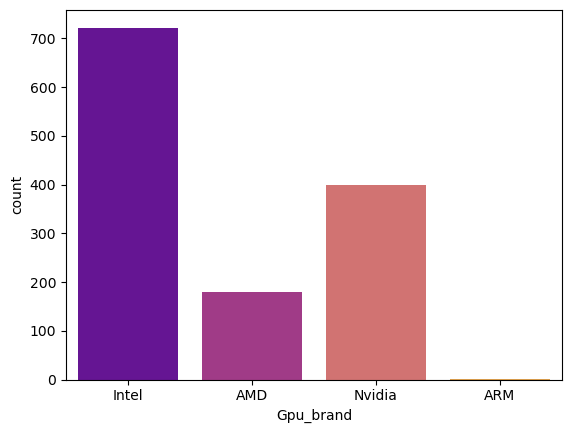

In [69]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(data=df,x=df['Gpu_brand'],palette='plasma')

<Axes: xlabel='Gpu_brand', ylabel='count'>

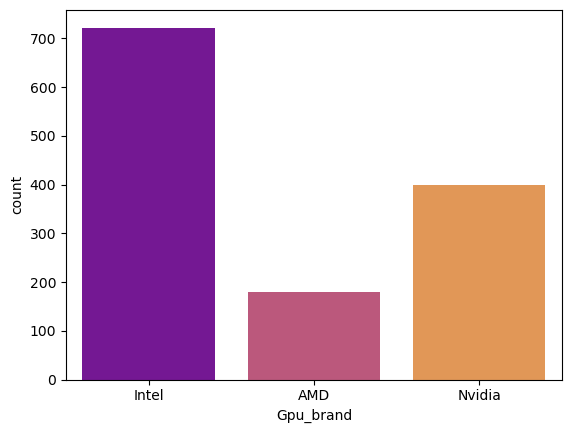

In [70]:
# removing the "ARM" tuple

df=df[df['Gpu_brand']!='ARM']
sns.countplot(data=df,x=df['Gpu_brand'],palette='plasma')

<Axes: xlabel='Gpu_brand', ylabel='Price'>

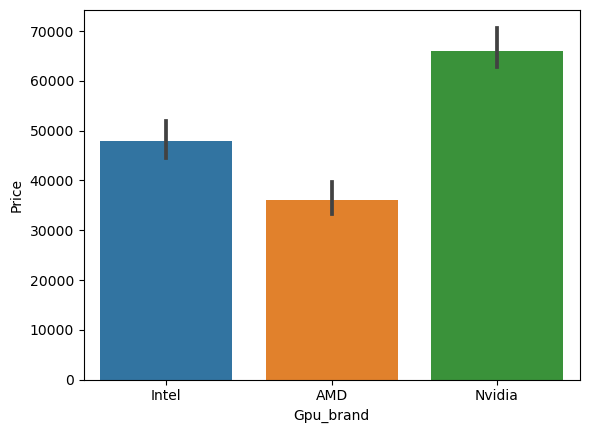

In [71]:
# price-Gpu analysis, i used np.median inorder to check if there is any
# inpact of outlier or not

sns.barplot(x=df['Gpu_brand'],y=df['Price'],estimator=np.median)

In [72]:
df=df.drop(columns='Gpu')
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


### Operating system analysis

In [73]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

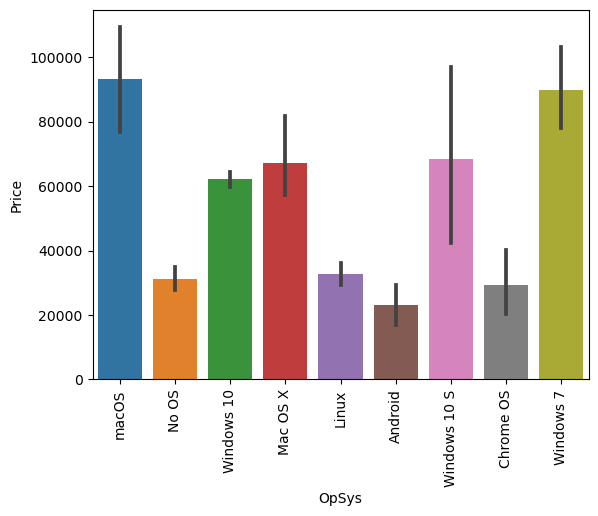

In [74]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt .show()

In [75]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [76]:
# club{windows 7, windows 10, windows 10 s}----> windows
# club{macOS, mac OS X}----> mac
# else return others

def setcategory(text):
    
    if text=='Windows 10' or text =='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text=='macOS' or text=='mac OS X':
        return 'Mac'
    else:
        return 'Other'

df['OpSys']=df['OpSys'].apply(lambda text:setcategory(text))
df.head()
    

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,Mac,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Mac,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Other,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,Mac,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Mac,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


In [77]:
df.sample(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,HDD,SSD,Gpu_brand
782,Toshiba,Ultrabook,14.0,16,Windows,1.47,93985.92,0,1,1920,1080,157.350512,Intel Core i7,0,512,Nvidia
1004,Toshiba,Notebook,13.3,4,Windows,1.20,63669.60,0,0,1920,1080,165.632118,Intel Core i5,0,128,Intel
1109,Asus,Gaming,15.6,16,Windows,2.59,71341.92,0,1,1920,1080,141.211998,Intel Core i7,1,128,Nvidia
535,Dell,Notebook,15.6,8,Windows,1.93,72940.32,0,0,1920,1080,141.211998,Intel Core i7,0,256,Nvidia
330,MSI,Gaming,17.3,8,Windows,2.70,63882.72,0,0,1920,1080,127.335675,Intel Core i7,1,256,Nvidia


<Axes: xlabel='OpSys', ylabel='count'>

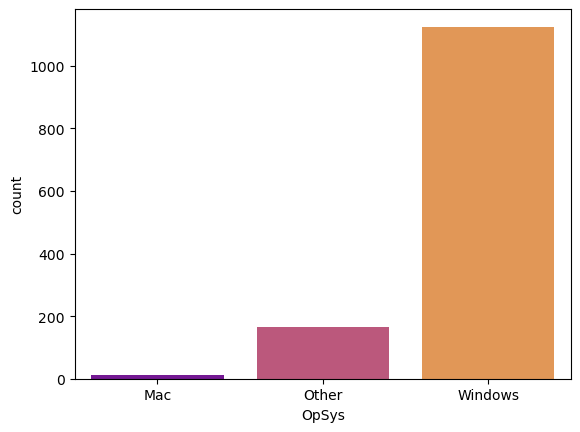

In [78]:
sns.countplot(data=df,x=df['OpSys'],palette='plasma')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

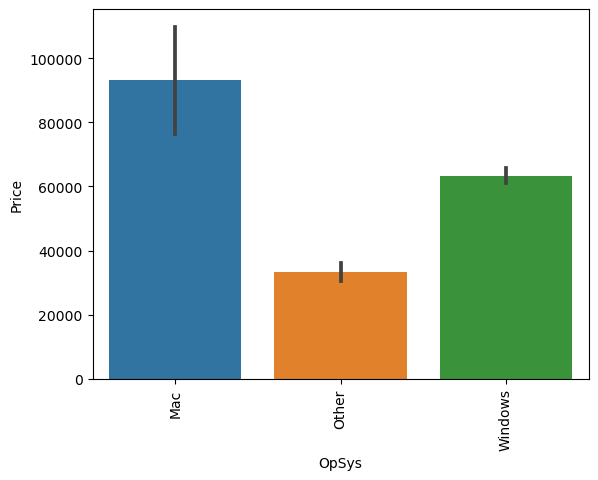

In [79]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

### Analysis on weight

C:\Users\Neelesha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


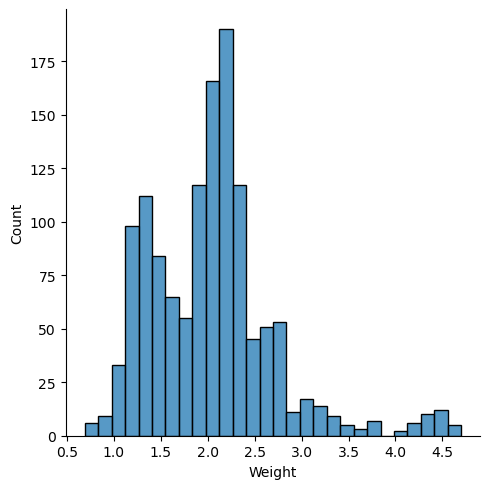

In [80]:
sns.displot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

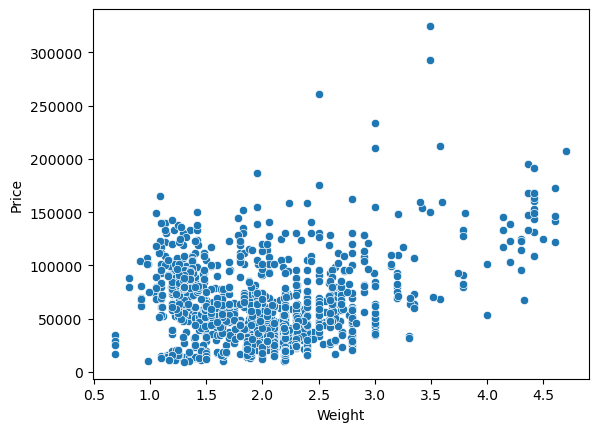

In [81]:
sns.scatterplot(x=df['Weight'], y=df['Price'])


### Price Analysis

C:\Users\Neelesha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


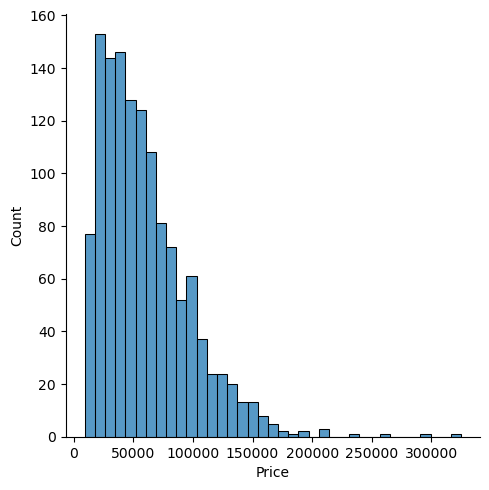

In [82]:
sns.displot(df['Price'])

C:\Users\Neelesha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


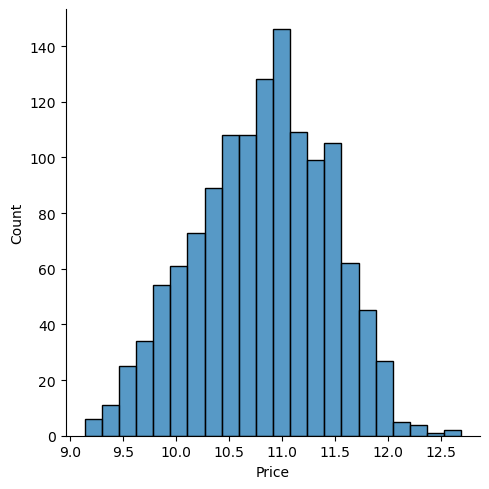

In [83]:
# so if we apply np.log to the price col we get a guassian distribution 

sns.displot(np.log(df['Price']))

In [84]:
# correlation with price

numeric_df= df.select_dtypes(include='number')
numeric_df.corr()['Price']

Inches         0.067329
Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
X_res          0.557369
Y_res          0.554591
PPI            0.475368
HDD           -0.235127
SSD            0.547147
Name: Price, dtype: float64

In [85]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


<Axes: >

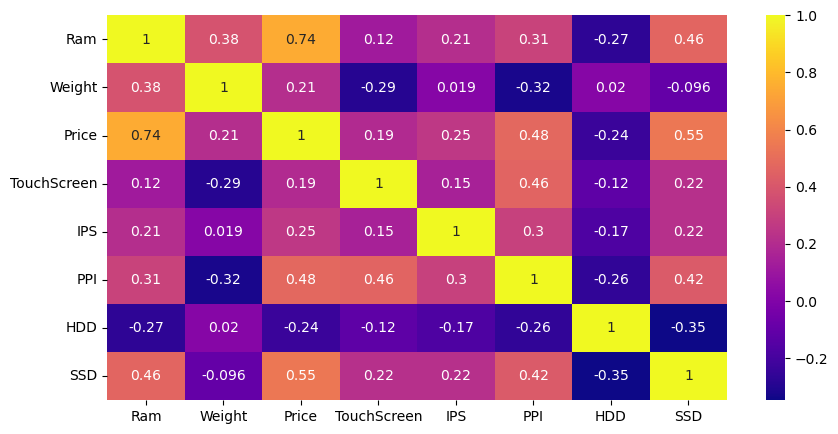

In [86]:
plt.figure(figsize=(10,5))
numeric_df=df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot=True,cmap='plasma')

## Model Building


In [87]:
test=np.log(df['Price'])
train= df.drop(['Price'],axis=1)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree


In [89]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.15,random_state=2)
x_train.shape,x_test.shape

((1106, 12), (196, 12))

In [90]:
mapper={i:value for i,value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu_brand'}

### Linear Regression

In [91]:
# we will apply one hot encoding on the columns with this indices----> [0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the ones undergoing the transformation

In [92]:
# step1: converting categorical variable into numeric variable
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 score 0.8075139659951478
MAE 0.2118912078878439


In [93]:
# now mae is 0.21 so if you want to check how much difference is there do this
# we see there is a difference of 1.23 only as per the original value
# that is our model predicts +0.21 more/less than the original price

np.exp(0.21)

1.2336780599567432

### Ridge Regression

In [94]:
# step1: converting categorical variable into numeric variable
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2=Ridge(alpha=10)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 score 0.8119827607126672
MAE 0.21221533247728386


### Lasso Regression

In [95]:
# step1: converting categorical variable into numeric variable
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2=Lasso(alpha=0.001)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 score 0.8062637175015926
MAE 0.21414668744914278


### Decision Tree

In [96]:
# we will apply one hot encoding on the columns with this indices----> [0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the ones undergoing the transformation

# step1: converting categorical variable into numeric variable
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=8)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 score 0.8472693948350793
MAE 0.18169823905651467


### Random Forest

In [97]:
# we will apply one hot encoding on the columns with this indices----> [0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the ones undergoing the transformation

# step1: converting categorical variable into numeric variable
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                           random_state=3,
                           max_samples=0.5,
                           max_features=0.75,
                           max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 score 0.8828126343044653
MAE 0.1600399145277052


In [98]:
import pickle

In [99]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [100]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


### Hyperparameter Tuning for Random Forest

In [101]:
indexlist=[0,1,3,8,11]
transformlist=[]
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)

transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu_brand']

In [102]:
train=pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,True,False,False,...,True,False,False,False,False,True,False,False,True,False
1,8,1.34,0,0,127.677940,0,0,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,8,1.86,0,0,141.211998,0,256,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,16,1.83,0,1,220.534624,0,512,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,8,1.37,0,1,226.983005,0,256,True,False,False,...,True,False,False,False,False,True,False,False,True,False


In [103]:
x_train,x_test,y_train,y_test=train_test_split(train,test,
                                               test_size=0.15,random_state=2)
x_train.shape,x_test.shape

((1106, 38), (196, 38))

In [104]:
from sklearn.tree import plot_tree

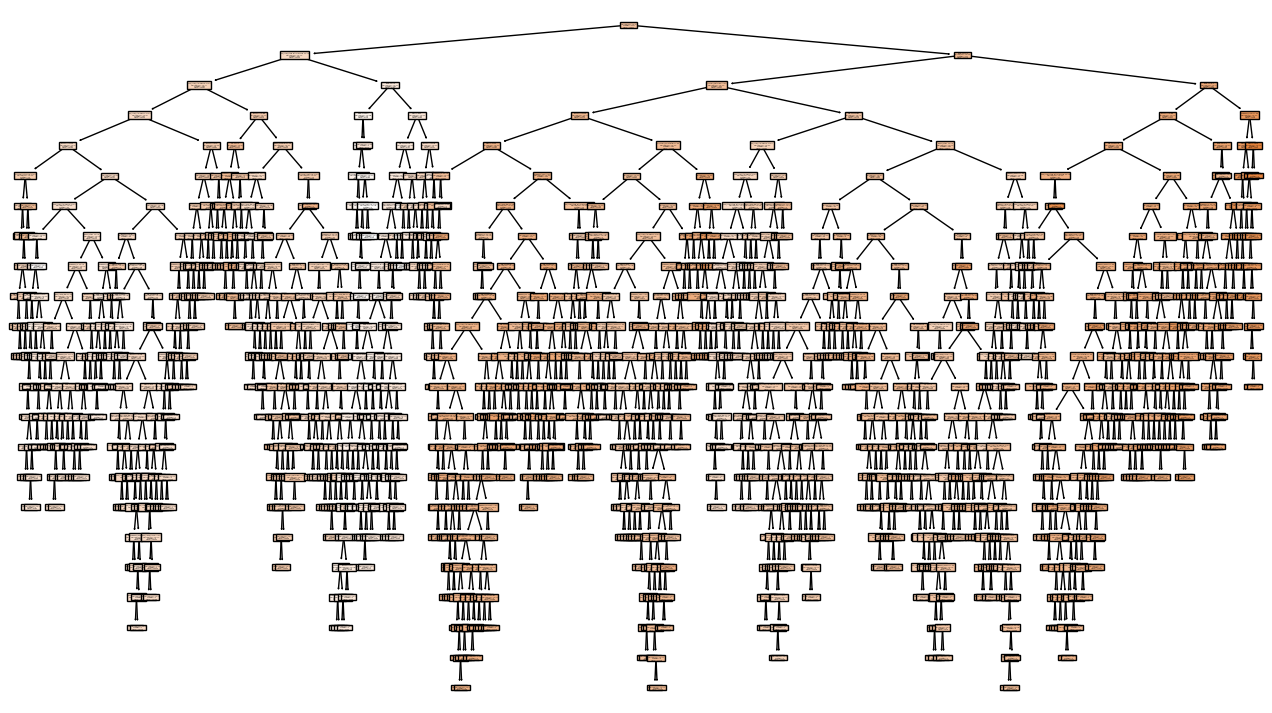

In [105]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(x_train, y_train)

# Convert feature names to a list
feature_names = train.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(16, 9))
plot_tree(reg, filled=True, feature_names=feature_names)
plt.show()

In [106]:
path=reg.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas

In [107]:
alphalist=[]
for alpha in ccp_alphas:
    reg=DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(x_train,y_train)
    alphalist.append(reg)

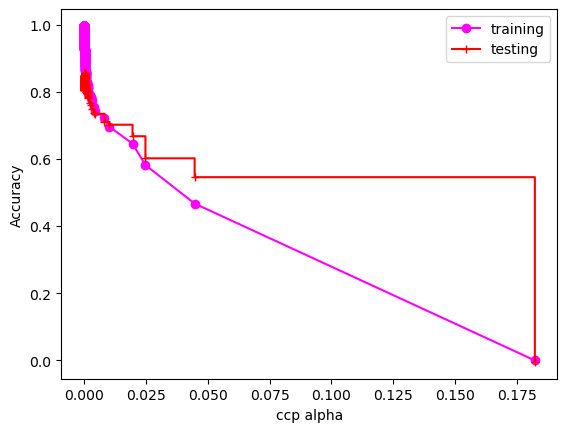

In [108]:
train_score=[reg.score(x_train,y_train) for reg in alphalist]
test_score=[reg.score(x_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker='o',
        label='training',color='magenta')
plt.plot(ccp_alphas,test_score,marker='+',
        label='testing', color='red',drawstyle='steps-post')
plt.legend()
plt.show()

#### Possible valuues of alpha can lie between [0.0025---->0.0075]

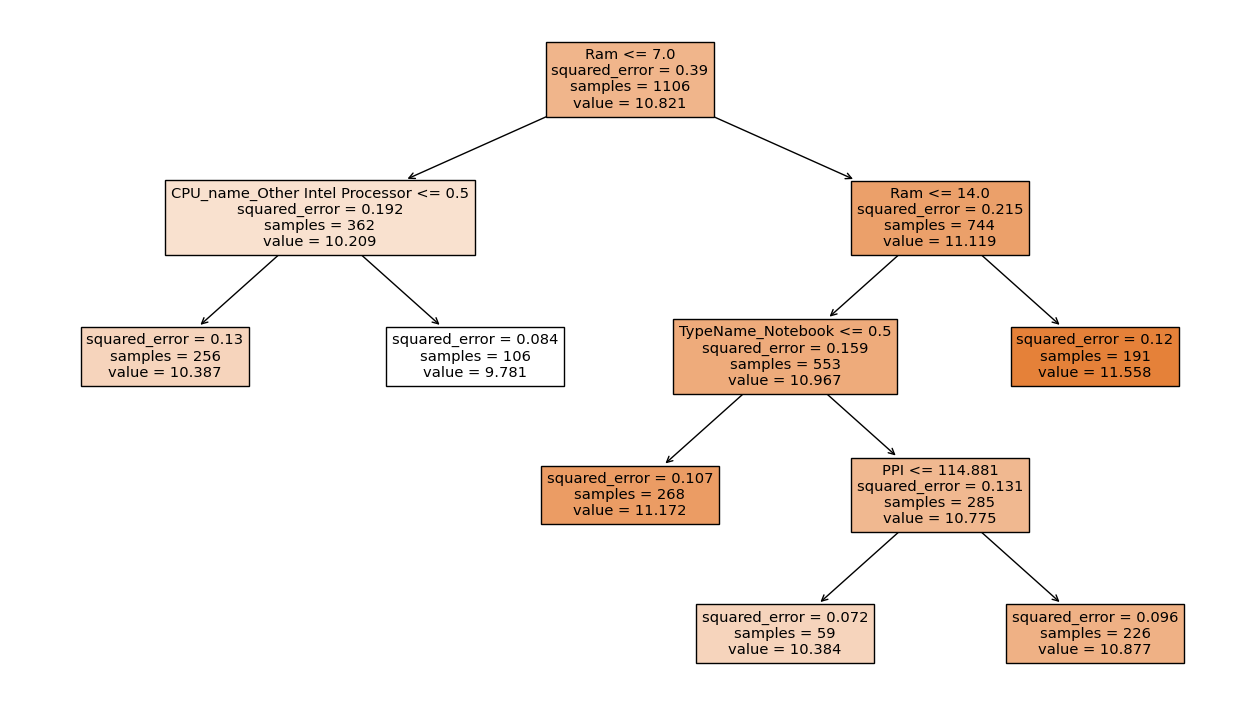

In [109]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(x_train, y_train)

# Convert feature names to a list
feature_names = train.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(16, 9))
plot_tree(reg, filled=True, feature_names=feature_names)
plt.show()

In [110]:
params = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [int(x) for x in np.linspace(100, 1200, 10)],
            'criterion': ['squared_error', 'absolute_error'],  # Corrected values
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['auto', 'sqrt', 'log2'],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'absolute_error'],  # Corrected values
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['auto', 'sqrt', 'log2'],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    }
}

In [111]:
scores = []
for modelname, mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                             param_distributions=mp['params'],
                             cv=5,
                             n_iter=10,
                             scoring='neg_mean_squared_error',
                             verbose=2)
    clf.fit(x_train, y_train)
    scores.append({
        'model_name': modelname,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_,
    })

# Print the scores
for score in scores:
    print(f"Model: {score['model_name']}")
    print(f"Best Score: {score['best_score']}")
    print(f"Best Estimator: {score['best_estimator']}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=466; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_sp

C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Neelesha\anaconda3\Lib

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=1, max_

C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Neelesha\anaconda3\Lib

In [112]:
scores_df=pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.091155,"(DecisionTreeRegressor(ccp_alpha=0.005, max_de..."
1,Decision Tree,-0.124860,"DecisionTreeRegressor(ccp_alpha=0.0025, max_de..."


In [113]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.09115490673422363,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.005, max_depth=30, max_features='log2',
                        min_samples_leaf=2, min_samples_split=14,
                        n_estimators=222)},
 {'model_name': 'Decision Tree',
  'best_score': -0.12486000950671601,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0025, max_depth=15, max_features='sqrt',
                        min_samples_leaf=10, min_samples_split=10)}]

In [114]:
rf=RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)
rf.fit(x_train,y_train)
ypred=rf.predict(x_test)
print(metrics.r2_score(y_test,y_pred))

0.8828126343044653


## Prediction on the whole Dataset

In [115]:
testtrain = np.array(train)

# Predict on the entire dataset at once
predicted = rf.predict(testtrain)

predicted

C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11.24334143, 11.18268903, 10.7949673 , ...,  9.77715124,
       10.26328765,  9.78156563])

In [116]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = np.exp(predicted)
ans

array([76369.70969782, 71875.37746645, 48774.71396441, ...,
       17626.36790728, 28660.85830363, 17704.34968654])

In [117]:
df['Predicted_price']=np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu_brand,Predicted_price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,76369.709698
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,71875.377466
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,48774.713964
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,104980.112345
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,77793.529572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,31357.855700
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,104914.653657
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,17626.367907
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1,0,AMD,28660.858304


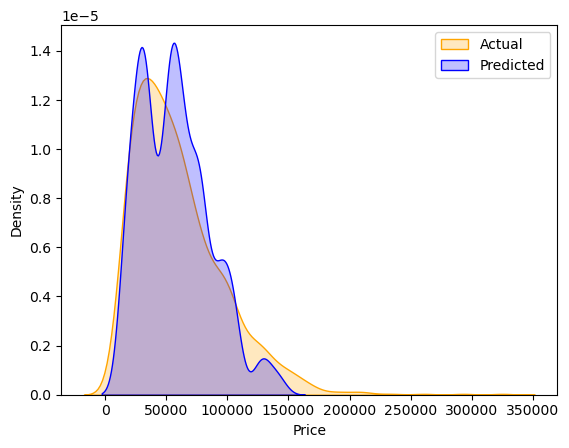

In [118]:
sns.kdeplot(df['Price'], color='orange', label='Actual', fill=True)
sns.kdeplot(df['Predicted_price'], color='blue', label='Predicted', fill=True)
plt.legend()
plt.show()

### Random Forest Regressor version_2

In [119]:
rf1 = RandomForestRegressor(n_estimators=200,
                            random_state=3,
                            max_samples=0.8,
                            max_features=0.6,
                            max_depth=20,
                            min_samples_split=4,
                            min_samples_leaf=2)

# rf1=RandomForestRegressor(n_estimators=110,random_state=3, max_samples=0.5, max_features=0.75,max_depth=15)
rf1.fit(x_train,y_train)
print(f'R2 Score: {metrics.r2_score(y_test,rf1.predict(x_test))}')

R2 Score: 0.8903406767490669


In [120]:
testtrain = np.array(train)

# Predict on the entire dataset at once
predicted = rf.predict(testtrain)

predicted

C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11.24334143, 11.18268903, 10.7949673 , ...,  9.77715124,
       10.26328765,  9.78156563])

In [121]:
ans = np.exp(predicted)
ans

array([76369.70969782, 71875.37746645, 48774.71396441, ...,
       17626.36790728, 28660.85830363, 17704.34968654])

In [122]:
df['Predicted_price']=np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu_brand,Predicted_price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,76369.709698
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,71875.377466
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,48774.713964
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,104980.112345
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,77793.529572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,31357.855700
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,104914.653657
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,17626.367907
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1,0,AMD,28660.858304


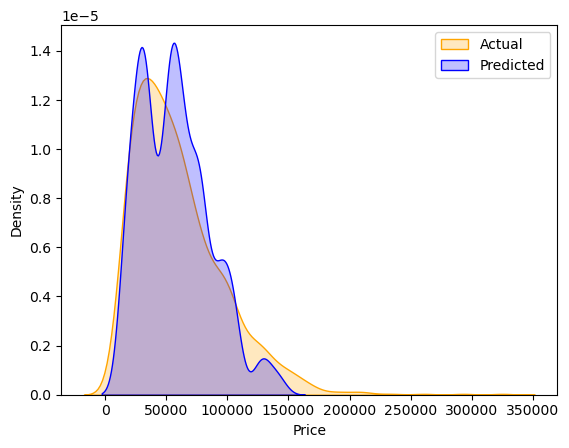

In [123]:
sns.kdeplot(df['Price'], color='orange', label='Actual', fill=True)
sns.kdeplot(df['Predicted_price'], color='blue', label='Predicted', fill=True)
plt.legend()
plt.show()